In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Consider CO as in Neil's doc
I=8.76*1.7e-47 #kg-m^2
hbar= 6.63e-34 #J -s
e1=(hbar**2)/I
print(e1)

2.951712328767123e-21


In [10]:
hc=2*3.14*hbar*3.e8
nutilde=e1/hc
print(nutilde/100)# so it's in cm^{-1}

23.630864089811823


In [12]:
I=1.7e-47 #kg-m^2
B=hbar/(4*3.14*3.e8*I)/100 # in cm^{-1}
print(B)

103.50318471337579


In [14]:
print(hbar/(4*3.14*3.e8))

1.7595541401273884e-43


In [15]:
.28/1.76

0.15909090909090912

In [16]:
.159*103.5

16.456500000000002

In [19]:
1.e2*2*3.14*hbar*3.e8/8.24e-23

1.5158883495145632

In [20]:
#energy corresponding to 15 microns:
c=3.e8
nu=c/15.e-6
e=2*3.14*hbar*nu
print(e)

8.32728e-20


In [24]:
vib=667.5 # cm^{-1}
r=0.089 # cm
s0=3.71e-19*1.e-4 # m^2
micron=1.e4
def sigma(wavel):  #wavelength in microns
    k=micron/wavel
    sigma = s0*np.exp(-r*np.abs(k-vib))
    return sigma

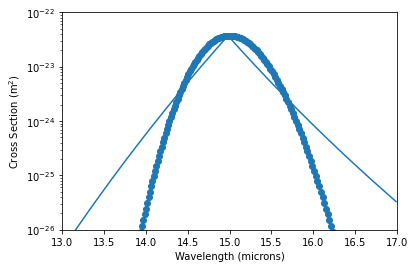

In [25]:
B=0.39 #cm^{-1} https://cccbdb.nist.gov/exp2x.asp?casno=124389
T = 280/11605. #eV
def rot(J):
    return J*(J+1)*B
lines=[]
height=[]
for j in range(100):
    argexp=rot(j)*2*3.14*1.97e-5/T
    boltz=np.exp(-argexp)#2*j+1)*
    linediff=rot(j+1)-rot(j)
    lines.append(vib+linediff)
    height.append(boltz)
## j-1 --> j
    if j >= 1:
        linediff=rot(j-1)-rot(j)
        lines.append(vib+linediff)
        argexp=rot(j-1)*2*3.14*1.97e-5/T
        boltz=np.exp(-argexp)#(2*(j-1)+1)*
        height.append(boltz)
height=np.array(height)
lines=np.array(lines)
lines=15*vib/lines
wavel=np.arange(13,17.,.01)
plt.scatter(lines,height*s0/height[0])
plt.yscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Cross Section (m$^2$)')
plt.plot(wavel,sigma(wavel))
plt.axis([13,17,1.e-26,1.e-22])
plt.savefig('../Figures/co2cross.png')

4.824924e-05 0.00149812734082397


## Find s0 such that the optical depth at 13.5 microns is equal to unity, as suggested by 34.13

In [15]:
H=8.5e3 #m
n = 420.e-6*1.25/(30.*1.67e-27)  #m^{-3}
k=1./13.2e-4  ## cm^{-1}
print(k)
sigma = s0*np.exp(-r*np.abs(k-vib))  #m^2
tau=n*sigma  # m^{-1}
kappa1 = 1./H 
print(tau,kappa1)


757.5757575757576
0.00012825328257549606 0.00011764705882352942


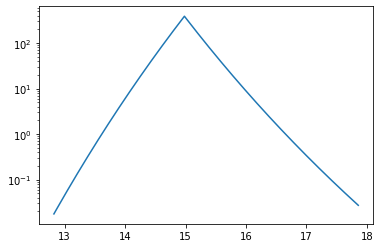

In [22]:
k=np.arange(560,780,.1)
sigma = s0*np.exp(-r*np.abs(k-vib))
tau=n*sigma
plt.plot(1.e4/k,tau*1.e3)
plt.yscale('log')